<a href="https://colab.research.google.com/github/shaikafroz016/cats_vs_dogs/blob/master/car_and_truck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir CarsTruck
!unzip /content/car-and-truck.zip -d /content/CarsTruck

Archive:  /content/car-and-truck.zip
error [/content/car-and-truck.zip]:  missing 20971520 bytes in zipfile
  (attempting to process anyway)
error [/content/car-and-truck.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
  (attempting to re-compensate)
file #1:  bad zipfile offset (local header sig):  0
  (attempting to re-compensate)
error [/content/car-and-truck.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
error [/content/car-and-truck.zip]:  attempt to seek before beginning of zipfile
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)
error [/content/car-and-truck.zip]:  attempt to seek before beginning of zipf

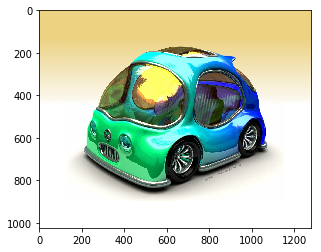

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_directory = '/content/drive/CarsTruck/Datasets' # Directory of training Data
categories = ['car', 'truck']                            # Categories of the training data
for category in categories:
  path = os.path.join(data_directory, category)                                 # Path for vehicle images
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))                              # Converting image to an array
    plt.imshow(img_array)
    plt.show()
    break
  break

In [0]:
print("Dimension of image : ",str(img_array.shape)+'\n')
print(img_array)  #Representation of image as array

Dimension of image :  (1024, 1280, 3)

[[[237 210 129]
  [237 210 129]
  [237 210 129]
  ...
  [237 210 129]
  [237 210 129]
  [237 210 129]]

 [[237 210 129]
  [237 210 129]
  [237 210 129]
  ...
  [237 210 129]
  [237 210 129]
  [237 210 129]]

 [[237 210 129]
  [237 210 129]
  [237 210 129]
  ...
  [237 210 129]
  [237 210 129]
  [237 210 129]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


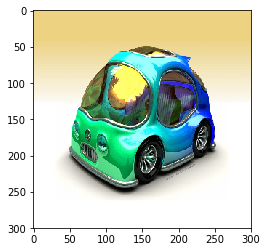

In [0]:
img_size = 300
img_new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(img_new_array)
plt.show()

In [0]:
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(data_directory, category)                               # Path for vehicle images
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))                          # Converting image to an array
        img_new_array = cv2.resize(img_array,(img_size, img_size))              # Resize all images in training data
        training_data.append([img_new_array, class_num])                        # Append new resized images to a list
      except Exception as E:
        pass
    
create_training_data()

In [0]:
print(len(training_data))

624


In [0]:
import random
random.shuffle(training_data)

In [0]:
features = []
labels = []

for feature,label in training_data:
  features.append(feature)
  labels.append(label)
  
features = np.array(features).reshape(-1, img_size, img_size, 3)  

In [0]:
import pickle

#Saving the processed images and labels list into files

pickle_out = open('vehicle_features', 'wb')
pickle.dump(features,pickle_out)
pickle_out.close()

pickle_out = open('vehicle_labels', 'wb')
pickle.dump(labels,pickle_out)
pickle_out.close()

In [0]:
#Building our model
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(300,300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#Training our model
history = model.fit(features,labels,batch_size=32, epochs = 20, validation_split = 0.1)

Train on 561 samples, validate on 63 samples
Epoch 1/20
561/561 [==============================] - 7s 13ms/sample - loss: 125.0048 - acc: 0.5579 - val_loss: 0.7199 - val_acc: 0.3968
Epoch 2/20
561/561 [==============================] - 4s 7ms/sample - loss: 0.6530 - acc: 0.6061 - val_loss: 0.6101 - val_acc: 0.6825
Epoch 3/20
561/561 [==============================] - 4s 7ms/sample - loss: 0.6200 - acc: 0.6702 - val_loss: 0.6200 - val_acc: 0.6825
Epoch 4/20
561/561 [==============================] - 4s 7ms/sample - loss: 0.6405 - acc: 0.6488 - val_loss: 0.6581 - val_acc: 0.6190
Epoch 5/20
561/561 [==============================] - 4s 7ms/sample - loss: 0.6319 - acc: 0.6488 - val_loss: 0.6178 - val_acc: 0.6825
Epoch 6/20
561/561 [==============================] - 4s 7ms/sample - loss: 0.5673 - acc: 0.7059 - val_loss: 0.6747 - val_acc: 0.6190
Epoch 7/20
561/561 [==============================] - 4s 7ms/sample - loss: 0.5424 - acc: 0.7344 - val_loss: 0.6876 - val_acc: 0.6349
Epoch 8/20
561

<Figure size 432x288 with 0 Axes>

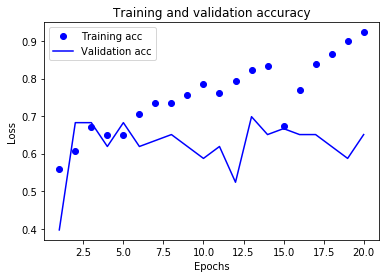

<Figure size 432x288 with 0 Axes>

In [0]:
# Plotting binary accuracy, validation binary accuracy, loss, validation loss, 
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()



In [0]:
model.save('car_model.h5')

[[0.35380077]]
 Given Image is a truck 


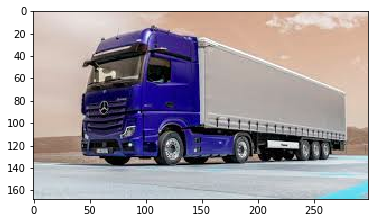

In [0]:
import cv2
import tensorflow as tf

categories = ['car', 'truck']


def prepare(filepath):
    img_size = 300  # 50 in txt-based
    img_array = cv2.imread(filepath,)
    img_new_array = cv2.resize(img_array, (img_size, img_size))
    return img_new_array.reshape(-1, img_size, img_size, 3)


model = tf.keras.models.load_model("car_model.h5")

test_img = '/content/truck1.jpg'
prediction = model.predict([prepare(test_img)])
print(prediction)  # will be a list in a list.
#print(categories[int(prediction[0][0])])
if prediction <= 0.3:
  print(" Given Image is a Car ")
elif prediction > 0.3:
  print(" Given Image is a truck ")



test_img_array = cv2.imread(test_img)
plt.imshow(test_img_array)
plt.show()